In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from keras.models import Sequential

In [3]:
train_dS = tf.keras.utils.image_dataset_from_directory(
    './train',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(300,300)
)

Found 1633 files belonging to 8 classes.
Using 1307 files for training.


In [4]:
class_names=train_dS.class_names
print(class_names)

['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


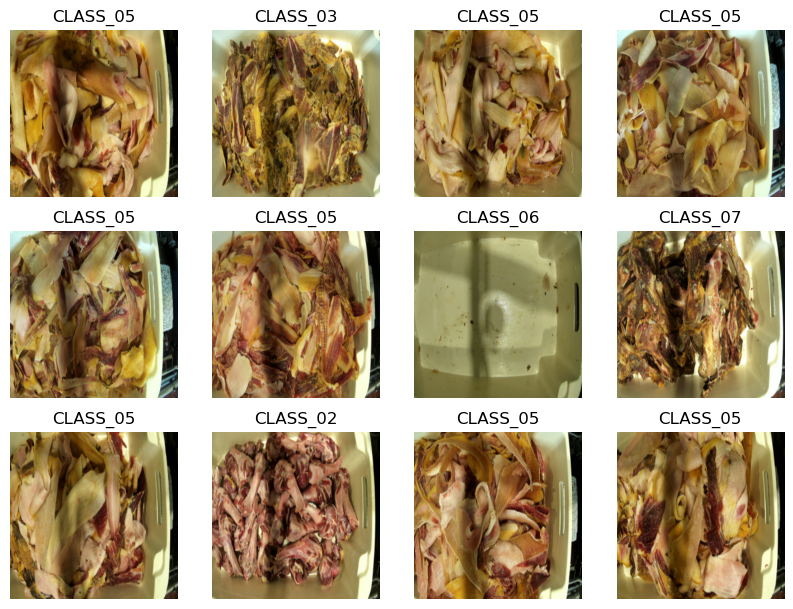

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images,labels in train_dS.take(1):
  for i in range(12):
    ax=plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [6]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
from keras.layers.convolutional.conv2d_transpose import Conv2D
num_clases=len(class_names)

model=tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255,input_shape=(300,300,3)),
    tf.keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_clases)
])

In [7]:
model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [8]:
epochs=10
history=model.fit(
    train_dS,
    epochs=epochs
)

Epoch 1/10
41/41 [==============================] - 22s 513ms/step - loss: 1.5795 - accuracy: 0.5501
Epoch 2/10
41/41 [==============================] - 22s 521ms/step - loss: 0.7597 - accuracy: 0.7261
Epoch 3/10
41/41 [==============================] - 22s 541ms/step - loss: 0.4581 - accuracy: 0.8363
Epoch 4/10
41/41 [==============================] - 23s 569ms/step - loss: 0.3426 - accuracy: 0.8753
Epoch 5/10
41/41 [==============================] - 24s 580ms/step - loss: 0.1377 - accuracy: 0.9579
Epoch 6/10
41/41 [==============================] - 24s 572ms/step - loss: 0.0372 - accuracy: 0.9962
Epoch 7/10
41/41 [==============================] - 24s 584ms/step - loss: 0.0236 - accuracy: 0.9946
Epoch 8/10
41/41 [==============================] - 25s 596ms/step - loss: 0.0756 - accuracy: 0.9717
Epoch 9/10
41/41 [==============================] - 26s 625ms/step - loss: 0.0509 - accuracy: 0.9862
Epoch 10/10
41/41 [==============================] - 25s 597ms/step - loss: 0.0237 - accura

In [9]:
test_dS=tf.keras.utils.image_dataset_from_directory(
    './test',
    seed=123,
    image_size=(300,300)
)

Found 811 files belonging to 8 classes.


In [11]:
model.evaluate(test_dS,return_dict=True)
model.save("modeloCarnes.h5py")

26/26 [==============================] - 3s 106ms/step - loss: 0.6041 - accuracy: 0.8656


INFO:tensorflow:Assets written to: modeloCarnes.h5py\assets


INFO:tensorflow:Assets written to: modeloCarnes.h5py\assets


In [12]:
image_path='22-CAPTURE_20220421_225004_317.png'
image=tf.keras.preprocessing.image.load_img(image_path).resize((300,300))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])
predicciones=model.predict(input_arr)


1/1 [==============================] - 0s 99ms/step


In [13]:
score=tf.nn.softmax(predicciones[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100*np.max(score))
)

Esta imagen parece ser CLASS_06 con un 99.16 % de exactitud.


In [20]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 6.1 MB/s eta 0:00:00


Found 811 images belonging to 8 classes.


C:\Users\User\AppData\Local\Temp\ipykernel_1120\1254735054.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicciones=custom_Model.predict_generator(generator=test_generator)


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     1.0000    0.0612    0.1154        49
           2     0.4966    0.7526    0.5984        97
           3     0.4231    0.9778    0.5906        45
           4     0.9541    0.8148    0.8790       459
           5     1.0000    0.7895    0.8824        19
           6     0.6861    0.8246    0.7490       114
           7     0.7692    0.3704    0.5000        27

    accuracy                         0.7559       811
   macro avg     0.6661    0.5738    0.5393       811
weighted avg     0.8288    0.7559    0.7514       811



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


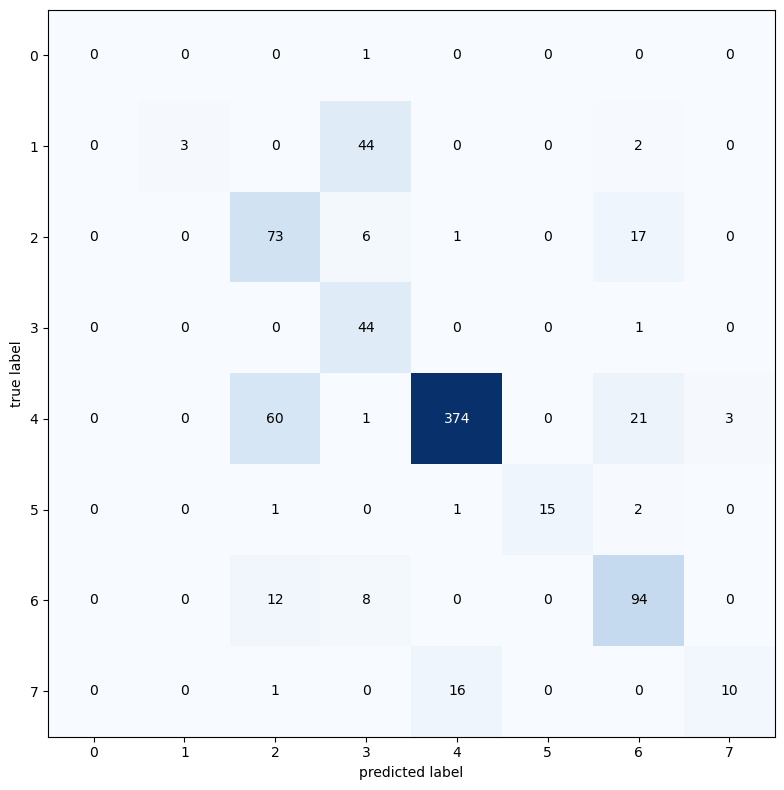

In [15]:
from sklearn.metrics import confusion_matrix,f1_score,roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

width_shape=300
height_shape=300

names=['CLASS_01','CLASS_02','CLASS_03','CLASS_04','CLASS_05','CLASS_06','CLASS_07','CLASS_08']
test_data_dir = './test'

test_datagen=ImageDataGenerator()

test_generator=test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape,height_shape),
    class_mode='categorical',
    shuffle=False)

custom_Model=load_model("modeloCarnes.h5py")
#custom_Model=modelo
predicciones=custom_Model.predict_generator(generator=test_generator)

y_pred=np.argmax(predicciones,axis=1)
y_real=test_generator.classes

matc=confusion_matrix(y_real,y_pred)
plot_confusion_matrix(conf_mat=matc, figsize=(8,8),show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred,digits=4))

